### Section 3.2.2

In [1]:
import pandas as pd
import numpy as np
import os, re
from datetime import date, timedelta

from analysis_utils import get_label_count, get_num_appearances, get_genres, get_genre_list, get_genre_intersections,get_genre_intersection_props, get_gender_distribution

In [2]:
data = pd.read_csv('../spotify_data/all_tracks.csv')

### Genre Partionning

In [3]:
pd.options.mode.chained_assignment = None

hip_list = get_genre_list(data,'hip hop')
hip_hop = data.iloc[hip_list,:]
hip_hop['genre'] = 'hh'
hip_hop.name = 'hip_hop'

rock_list = get_genre_list(data,'rock')
rock = data.iloc[rock_list,:]
rock['genre'] = 'rk'
rock.name = 'rock'

blues_list = get_genre_list(data,'blues')
blues = data.iloc[blues_list,:]
blues['genre'] = 'bl'
blues.name = 'blues'

country_list = get_genre_list(data,'country')
country = data.iloc[country_list,:]
country['genre'] = 'ct'
country.name = 'country'

electronic_list = get_genre_list(data,'(electronic)|(edm)')
electronic = data.iloc[electronic_list,:]
electronic['genre'] = 'el'
electronic.name = 'electronic'

folk_list = get_genre_list(data,'folk')
folk = data.iloc[folk_list,:]
folk['genre'] = 'fk'
folk.name = 'folk'

jazz_list = get_genre_list(data,'jazz')
jazz = data.iloc[jazz_list,:]
jazz['genre'] = 'jz'
jazz.name = 'jazz'

latin_list = get_genre_list(data,'latin')
latin = data.iloc[latin_list,:]
latin['genre'] ='la'
latin.name = 'latin'

pop_list = get_genre_list(data,'pop')
pop = data.iloc[pop_list,:]
pop['genre'] = 'pp'
pop.name = 'pop'

r_b_list = get_genre_list(data,'(r&b)|(soul)')
r_b = data.iloc[r_b_list,:]
r_b['genre'] = 'rb'
r_b.name = "r&b/soul"

indie_list = get_genre_list(data,'indie')
indie = data.iloc[indie_list,:]
indie['genre'] = 'in'
indie.name = 'indie'

house_list = get_genre_list(data,'house')
house = data.iloc[house_list,]
house['genre'] = 'hs'
house.name = 'house'

rap_list = get_genre_list(data,'rap')
rap = data.iloc[rap_list,]
rap['genre'] = 'rp'
rap.name = 'rap'

In [4]:
all_buc_genres = pd.concat([hip_hop, pop, rock, blues, rap, country, electronic, folk, indie, jazz, latin, r_b, house])

In [5]:
# 'other' category
other = data[~data['index'].isin(all_buc_genres['index'])]
other = other[~(other['artist_genres'].isna())]
print("Amount of tracks in 'other' category: ", len(other))
print("Amount of unique tracks in 'other' category: ", len(other['track_id'].unique()))

Amount of tracks in 'other' category:  23023
Amount of unique tracks in 'other' category:  2471


In [6]:
other_men = other[other['gender']==1]
other_women = other[other['gender']==0]

In [7]:
print('man concentration ratio in other category: ', len(other_men)/(len(other_men)+len(other_women)))
print('woman concentration ratio in other category: ', len(other_women)/(len(other_men)+len(other_women)))

man concentration ratio in other category:  0.7534694528632956
woman concentration ratio in other category:  0.24653054713670441


### Gender distribution by genre

In [8]:
rap_perc, electronic_perc, pop_perc = get_gender_distribution(rap), get_gender_distribution(electronic), get_gender_distribution(pop)

In [9]:
hip_hop_perc, rock_perc = get_gender_distribution(hip_hop), get_gender_distribution(rock)

In [10]:
blues_perc, country_perc, folk_perc = get_gender_distribution(blues), get_gender_distribution(country), get_gender_distribution(folk)

In [11]:
jazz_perc, latin_perc, r_b_perc = get_gender_distribution(jazz), get_gender_distribution(latin), get_gender_distribution(r_b)

In [12]:
indie_perc, house_perc = get_gender_distribution(indie), get_gender_distribution(house)

In [13]:
other_perc = get_gender_distribution(other)

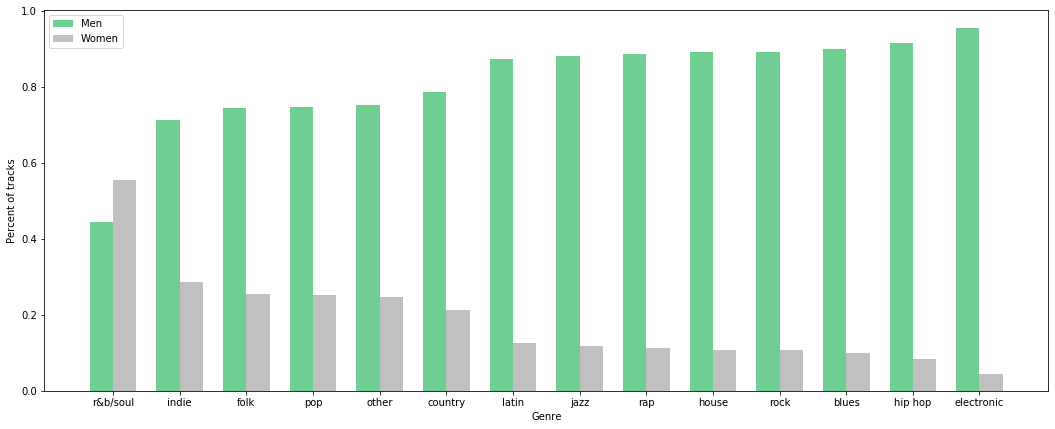

In [15]:
import matplotlib.pyplot as plt
N = 14
men_perc = (r_b_perc, indie_perc, folk_perc, pop_perc,other_perc,country_perc,latin_perc,jazz_perc,rap_perc,house_perc,rock_perc,blues_perc,hip_hop_perc,electronic_perc)
women_perc = (1-r_b_perc, 1-indie_perc, 1-folk_perc, 1-pop_perc,1-other_perc,1-country_perc,1-latin_perc,1-jazz_perc,1-rap_perc,1-house_perc,1-rock_perc,1-blues_perc,1-hip_hop_perc,1-electronic_perc)
ind = np.arange(N)
width = 0.35
plt.figure(figsize=(18,7))
plt.bar(ind, men_perc, width, label='Men', color='#71CE92')
plt.bar(ind + width, women_perc, width,
    label='Women', color='silver')

plt.ylabel('Percent of tracks')
plt.xlabel('Genre')

plt.xticks(ind + width / 2, ('r&b/soul', 'indie', 'folk','pop','other','country','latin','jazz','rap','house','rock','blues','hip hop','electronic'))
plt.legend(loc='best')
plt.savefig('gender_dist_genre.png')
plt.show(10,10)

In [21]:
# average concentration
total = 0
for man_ratio in men_perc:
    total += man_ratio
print("Average male concentration ratio:", total/len(men_perc)*100)

Average male concentration ratio: 81.37364598336887


In [24]:
# concentration across dataset as a whole (including other)
all_genres = pd.concat([all_buc_genres, other])
women = all_genres[all_genres['gender']==0]
men = all_genres[all_genres['gender']==1]
print("Male concentration ratio across dataset:", len(men)/(len(men)+len(women))*100)

Male concentration ratio across dataset: 80.86180274078363


In [25]:
# concentration across dataset as a whole (excluding other)
women = all_buc_genres[all_buc_genres['gender']==0]
men = all_buc_genres[all_buc_genres['gender']==1]
print("Male concentration ratio across dataset:", len(men)/(len(men)+len(women))*100)

Male concentration ratio across dataset: 81.09358344339338


In [23]:
all_genres.head(5)

,index,track_name,track_id,date_added,album_name,release_date,track_duration_ms,track_popularity,artist,artist_id,...,instrumentalness,liveness,valence,tempo,time_signature,playlist_name,playlist_type,gender,label,genre
1515,1515,Truth Hurts,5Qel1sTrU4LM8HlJSPT2jd,2019-05-10T04:01:32Z,Truth Hurts,2017-09-19,173325,79,Lizzo,56oDRnqbIiwx4mymNEv7dS,...,0.000000,0.123,0.412,158.087,4.0,Mood_Booster,s,0.0,Nice Life/Atlantic,hh
1560,1560,Tempo (feat. Missy Elliott),6nBQFAIVFmAx2oZ8p6lUg6,2019-05-10T04:01:32Z,Cuz I Love You,2019-04-19,175342,72,Lizzo,56oDRnqbIiwx4mymNEv7dS,...,0.000011,0.358,0.588,107.019,4.0,Mood_Booster,s,0.0,Atlantic Records,hh
1632,1632,Truth Hurts,5Qel1sTrU4LM8HlJSPT2jd,2019-05-10T04:01:32Z,Truth Hurts,2017-09-19,173325,76,Lizzo,56oDRnqbIiwx4mymNEv7dS,...,0.000000,0.123,0.412,158.087,4.0,Mood_Booster,s,0.0,Nice Life/Atlantic,hh
1644,1644,Tempo (feat. Missy Elliott),6nBQFAIVFmAx2oZ8p6lUg6,2019-05-10T04:01:32Z,Cuz I Love You,2019-04-19,175342,73,Lizzo,56oDRnqbIiwx4mymNEv7dS,...,0.000011,0.358,0.588,107.019,4.0,Mood_Booster,s,0.0,Atlantic Records,hh
1700,1700,Truth Hurts,5Qel1sTrU4LM8HlJSPT2jd,2019-05-24T04:20:18Z,Truth Hurts,2017-09-19,173325,74,Lizzo,56oDRnqbIiwx4mymNEv7dS,...,0.000000,0.123,0.412,158.087,4.0,Mood_Booster,s,0.0,Nice Life/Atlantic,hh


### Chi Squared Test for Independence

    Ho: Artist Gender and Genre are independent.

    Ha: Artist Gender and Genre are dependent.

In [33]:
table = [[23646,30124,76384,15670,16421,590,3237,9089,1596,9774,5932,13838,35619,9447],
        [3007,1436,25642,1422,1965,10,882,3128,212,1409,1704,5556,4276,3091]]

In [34]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(table)
print('dof = %d' % dof)

prob = 0.95
alpha = 1.0 - prob
critical = chi2.ppf(prob, dof)
print('probability = %.3f, critical = %.3f, stat = %.3f' % (prob, critical, stat))
print('significance = %.3f, p = %.3f' % (alpha, p))

dof = 13
probability = 0.950, critical = 22.362, stat = 14447.774
significance = 0.050, p = 0.000


### Building a data set with unique genre tags

In [34]:
unique_artists = pd.read_csv('../spotify_data/all_unique_artist.csv')

In [39]:
unique_artists.head(5)

,artist,artist_id,gender,record_label,artist_country,current_city,hometown_city,band_members,spotify_tags
0,Michael Jackson,3fMbdgg4jU18AjLCKBhRSm,1.0,Epic/Legacy Recordings,us,NaN,NaN,NaN,pop
1,Toto,0PFtn5NtBbbUNbU9EAmIWF,1.0,Toto Recordings,us,Los Angeles,Los Angeles,Steve Lukather - Guitar and Vocals \nDavid Pai...,rock/album rock/mellow gold/soft rock
2,The Who,67ea9eGLXYMsO2eYQRui3w,1.0,Universal / Polydor,gb,NaN,NaN,The Official Facebook page of The Who.\nPete T...,rock/singer-songwriter/album rock/classic rock...
3,Eurythmics,0NKDgy9j66h3DLnN8qu1bB,1.0,Legacy,gb,NaN,NaN,Annie Lennox\nDave Stewart,rock/synthpop/art rock/mellow gold/soft rock/d...
4,Journey,0rvjqX7ttXeg3mTy8Xscbt,1.0,Nomota Sony,us,NaN,San Francisco,Neal Schon (lead guitar backing vocals) Ross V...,rock/album rock/classic rock/hard rock/mellow ...


In [40]:
artist_ids = unique_artists['artist_id']

In [41]:
all_tracks = pd.read_csv('../spotify_data/all_tracks.csv')

In [42]:
all_tags = []
for artist_id in artist_ids:
    tags=[]
    artist = all_tracks[all_tracks['artist_id'] == artist_id]
    for i in range(0,len(artist)):
        try:
            art_tags = artist[['artist_genres']].iloc[i,0].split(',')
        except:
            continue
        
        for tag in art_tags:
            if tag not in tags:
                tags.append(tag)
    

    if len(tags) == 0:
        all_tags.append(np.nan)
    else:
        all_tags.append(tags)
    

In [43]:
unique_artists['unique_tags'] = all_tags

In [44]:
unique_artists.to_csv('../spotify_data/all_unique_artist_with_tags.csv')

### Average number of unique tags by artist

In [83]:
men = unique_artists[unique_artists['gender']==1]
women = unique_artists[unique_artists['gender']==0]

In [46]:
total = 0
count = 0
for i in range(0,len(men)):
    try:
        total += len(men.iloc[i,9])
    except:
        continue
    # nan's not counted in average
    count += 1
        
print("average number of unique tags for men:", total/count)    

average number of unique tags for men: 4.813675724096745


In [47]:
total = 0
count = 0
for i in range(0,len(women)):
    try:
        total += len(women.iloc[i,9])
    except:
        continue
    # nan's not counter in average
    count += 1
        
print("average number of unique tags for women:", total/count)    

average number of unique tags for women: 3.885899814471243


### Number of genres artist is bucketed to 

In [58]:
total = 0
count = 0
for artist in men['artist_id'].unique():
    artist_tracks = all_buc_genres[all_buc_genres['artist_id']==artist]
    try:
        total += len(artist_tracks['genre'].unique())
    except:
        continue
    count += 1
    
print("average number of genres for men:", total/count)

average number of genres for men: 1.7909166435890336


In [59]:
total = 0
count = 0
for artist in women['artist_id'].unique():
    artist_tracks = all_buc_genres[all_buc_genres['artist_id']==artist]
    try:
        total += len(artist_tracks['genre'].unique())
    except:
        continue
    count += 1
    
print("average number of genres for women:", total/count)

average number of genres for women: 1.1522292993630574


### Number of genre tags by track

In [61]:
unique_tracks = all_tracks.drop_duplicates(subset='track_id')

In [62]:
tags = unique_tracks[['track_id','artist_id', 'artist_genres','gender','playlist_type']]

In [63]:
tags['tag_count'] = tags.artist_genres.str.count(',')
tags['tag_count'] = tags['tag_count'] + 1 #since 3 genres = 2 commas

In [91]:
tags = tags.dropna(subset=['tag_count'])

In [92]:
men = tags[tags['gender']==1]
women = tags[tags['gender']==0]

In [93]:
print('mean number of tags for track by a man artist: ', men['tag_count'].sum()/len(men))

mean number of tags for track by a man artist:  4.664264849074976


In [94]:
print('mean number of tags for track by a woman artist: ', women['tag_count'].sum()/len(women))

mean number of tags for track by a woman artist:  3.9370811615785555


### Number of genre buckets by track

In [78]:
unique_tracks_men = unique_tracks[unique_tracks['gender']==1]
total = 0
count = 0
for track in unique_tracks_men['track_id']:
    tracks = all_buc_genres[all_buc_genres['track_id']==track]
    try:
        total += len(tracks['genre'].unique())
       
    except:
        continue
    count += 1

print('Average number of genres a track by a man artist is bucketed to:', total/count)

Average number of genres a track by a man artist is bucketed to: 2.0410085632730732


In [79]:
unique_tracks_women = unique_tracks[unique_tracks['gender']==0]
total = 0
count = 0
for track in unique_tracks_women['track_id']:
    tracks = all_buc_genres[all_buc_genres['track_id']==track]
    try:
        total += len(tracks['genre'].unique())
       
    except:
        continue
    count += 1

print('Average number of genres a track by a woman artist is bucketed to:', total/count)

Average number of genres a track by a woman artist is bucketed to: 1.4818775995246583
